In [12]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from matplotlib import pyplot
import numpy as np
from tensorflow.keras.preprocessing import image

In [13]:
mnist_data = tfds.load(name="mnist")

for item in mnist_data:
    print(item)

test
train


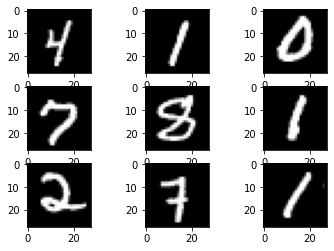

In [14]:
(training_images, training_labels),(test_images, test_labels) = tfds.as_numpy(tfds.load(name='mnist', split=['train', 'test'], batch_size=-1, as_supervised=True))
training_images = training_images/255.0
test_images = test_images/255.0

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(training_images[i].reshape(training_images[i].shape[0],training_images[i].shape[1]), cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [16]:
model = tf.keras.models.load_model('digit_guesser.model')

313/313 [==============================] - 1s 2ms/step
0th image


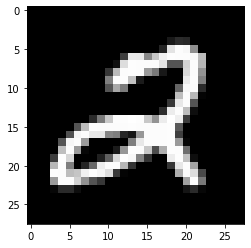

predicted no.: 2
actually: 2
7000th image


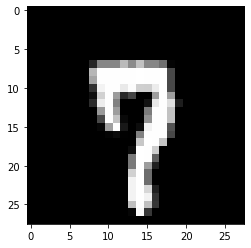

predicted no.: 7
actually: 7


In [17]:
classifications = model.predict(test_images)
# results for 0th image
print("0th image")
pyplot.imshow(test_images[0].reshape(test_images[0].shape[0],test_images[0].shape[1]), cmap=pyplot.get_cmap('gray'))
pyplot.show()
print("predicted no.: "+str(np.argmax(classifications[0])))
print("actually: "+str(test_labels[0]))
# results for 7000th image
print("7000th image")
pyplot.imshow(test_images[7000].reshape(test_images[7000].shape[0],test_images[7000].shape[1]), cmap=pyplot.get_cmap('gray'))
pyplot.show()
print("predicted no.: "+str(np.argmax(classifications[7000])))
print("actually: "+str(test_labels[7000]))

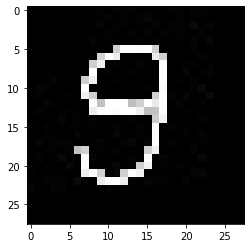

1/1 [==============================] - 0s 53ms/step

Predicted Digit: 9


In [18]:
path = 'digit.jpg'

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = x[:,:,0]
x = np.expand_dims(x, axis=2)

pyplot.imshow(x.reshape(x.shape[0],x.shape[1]), cmap=pyplot.get_cmap('gray'))
pyplot.show()
image_tensor = np.vstack([x])
classes = model.predict(image_tensor)
print("\nPredicted Digit: "+str(np.argmax(classes[0])))